In [2]:
import pandas as pd
import numpy as np
import scipy
import os 
import glob
from datetime import datetime, timedelta, date
from matplotlib import pyplot as plt
from functools import reduce

<AxesSubplot:xlabel='Counterparty', ylabel='Standard deviation / Size'>

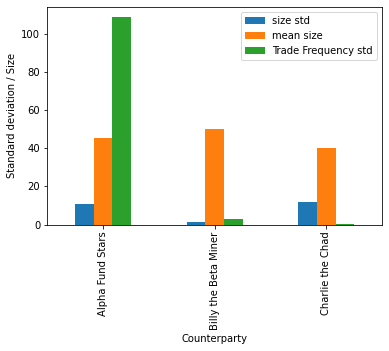

In [3]:
path = 'C://Users//TM//Documents//Python Scripts//Binance download//OTC//'                     
     # advisable to use os.path.join as this makes concatenation OS independent

filename = 'OTC Simulated details.csv'    

f = path + filename
    
df_otc_file = (pd.read_csv(f))
df_otc_file.sort_values(by=['Time period'])
# Replace NaN with 0 
df_otc_file = df_otc_file.fillna(0)
#delete if buy and sell are both = 0, because this means that they did not make any trade at all 
#Find standard deviation in size and standard deviation in frequency of trading

#df_otc_file = df_otc_file[(df_otc_file.Buy = 0) & (df_otc_file.Sell =0)]

df_otc_file = df_otc_file.fillna(0)
df_otc_file = df_otc_file[(df_otc_file.Buy != 0) | (df_otc_file.Sell !=0)]
df_otc_file = df_otc_file.sort_values(by=['Time period'])
Counterparties = df_otc_file['Counterparty'].unique()
df_otc_file['Size Difference in transaction'] = df_otc_file.groupby('Counterparty')['Size'].diff()
df_otc_file['Time Difference in transaction'] = df_otc_file.groupby('Counterparty')['Time period'].diff()
df_otc_file['Size Difference in transaction'] = df_otc_file.groupby('Counterparty')['Size'].diff()
df_otc_file = df_otc_file.sort_values(by=['Counterparty','Time period'])
df_otc_file['std in size'] = df_otc_file['Size Difference in transaction']\
.rolling(len(df_otc_file.groupby('Counterparty')['Size']\
            ),min_periods=2).std()

#df_plot = df_otc_file.groupby('Counterparty', as_index=False)['Size'].mean()
x = ['Size', 'Time Difference in transaction']
#st_dev = prices.groupby('ticker')['lret'].agg(['mean', 'std'])
df_plot = df_otc_file.groupby('Counterparty', as_index=False)['Size'].agg(['std','mean'])
df_plot_2 = df_otc_file.groupby('Counterparty', as_index=False)['Time Difference in transaction'].agg(['std'])
df_plot=df_plot.merge(df_plot_2, on='Counterparty', how='left')
columns_for_plotting = ['size std', 'mean size', 'Trade Frequency std']


df_plot=df_plot.rename(columns = {'std_x':'size std', 'mean':'mean size','std_y':'Trade Frequency std'})

df_plot.plot.bar(ylabel = "Standard deviation / Size")
#df_otc_file['Time Difference in transaction'] = df_otc_file.groupby('Counterparty')['Time period'].diff()



In [4]:
df_plot

,size std,mean size,Trade Frequency std
Counterparty,,,
Alpha Fund Stars,10.587729,45.050000,108.397106
Billy the Beta Miner,1.423564,49.993367,3.150047
Charlie the Chad,11.767173,39.966955,0.486630


In [6]:
df_plot = df_otc_file.groupby('Counterparty', as_index=False)['Size'].agg(['std','mean']).reset_index()
df_plot = df_otc_file.groupby('Counterparty', as_index=False)['Size'].agg(['std','mean']).reset_index()
df_plot_2 = df_otc_file.groupby('Counterparty', as_index=False)['Time Difference in transaction'].agg(['std']).reset_index()
df_plot_3 = df_otc_file.groupby('Counterparty', as_index=False)['Buy'].sum()
df_plot_4 = df_otc_file.groupby('Counterparty', as_index=False)['Sell'].sum()

x = ['Counterparty','Standard deviation in size', 'Average Size']

df_plot = df_plot.set_axis(x,axis =1)


y = ['Counterparty','Standard deviation in Frequency']

z = ['Counterparty','Number of buys']

k = ['Counterparty','Number of sells']


df_plot_2 = df_plot_2.set_axis(y,axis =1)

df_plot_3 = df_plot_3.set_axis(z,axis =1)

df_plot_4 = df_plot_4.set_axis(k,axis =1)

In [9]:
y = [df_plot,df_plot_2,df_plot_3,df_plot_4]
dfs = [df_plot,df_plot_2,df_plot_3,df_plot_4]

df_final = reduce(lambda left,right: pd.merge(left,right,on='Counterparty'), dfs)
df_final

,Counterparty,Standard deviation in size,Average Size,Standard deviation in Frequency,Number of buys,Number of sells
0,Alpha Fund Stars,10.587729,45.050000,108.397106,20.0,20.0
1,Billy the Beta Miner,1.423564,49.993367,3.150047,0.0,603.0
2,Charlie the Chad,11.767173,39.966955,0.486630,987.0,980.0


In [25]:
df_final[ '% of buy'] = (100* df_final[ 'Number of buys'] / (df_final['Number of buys'] + df_final['Number of sells']))
df_final[ '% of sells'] = (100* df_final[ 'Number of sells'] / (df_final['Number of buys'] + df_final['Number of sells']))

df_final = df_final.round(1)

In [26]:

Standard_deviation_plot = ['Standard deviation in size', 'Standard deviation in Frequency']
absolute_num_plot = ['Average Size','Number of buys','Number of sells']
percentages_plot = ['% of buy','% of sells']



#plot number of buys, number of sells, average buy size, average sell size

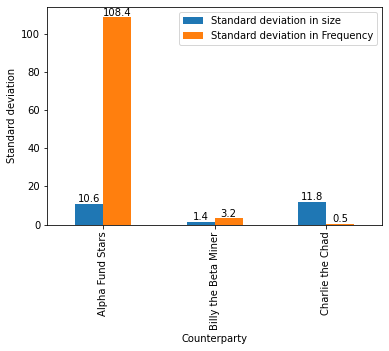

In [27]:
ax = df_final.plot.bar(x='Counterparty',ylabel = "Standard deviation",\
                  y=Standard_deviation_plot)

for container in ax.containers:
    ax.bar_label(container)

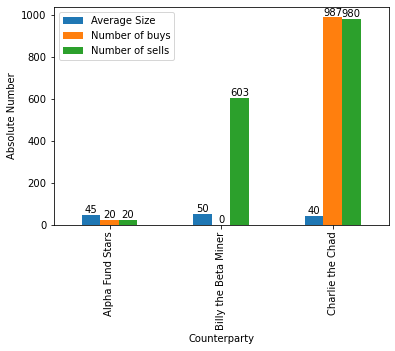

In [28]:
ax = df_final.plot.bar(x='Counterparty',ylabel = "Absolute Number",\
                  y=absolute_num_plot)


for container in ax.containers:
    ax.bar_label(container)

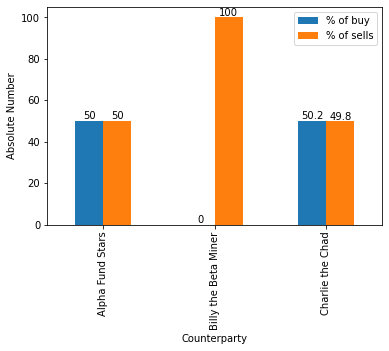

In [29]:
ax = df_final.plot.bar(x='Counterparty',ylabel = "Absolute Number",\
                  y=percentages_plot)


for container in ax.containers:
    ax.bar_label(container)

In [87]:
df_otc_file

,Time period,Counterparty,Buy,Sell,Size,Size Difference in transaction,Time Difference in transaction,std in size
4750,15,Alpha Fund Stars,1.0,0.0,53,NaN,NaN,NaN
4751,60,Alpha Fund Stars,0.0,1.0,44,-9.0,45.0,NaN
4752,63,Alpha Fund Stars,0.0,1.0,48,4.0,3.0,9.192388
4754,65,Alpha Fund Stars,1.0,0.0,56,8.0,2.0,8.888194
4753,65,Alpha Fund Stars,1.0,0.0,44,-12.0,0.0,10.583005
...,...,...,...,...,...,...,...,...
2368,2369,Charlie the Chad,1.0,0.0,55,3.0,2.0,2.000000
2370,2371,Charlie the Chad,1.0,0.0,49,-6.0,2.0,6.658328
2371,2372,Charlie the Chad,1.0,0.0,50,1.0,1.0,4.725816
2373,2374,Charlie the Chad,0.0,1.0,27,-23.0,2.0,12.342339


In [ ]:
#Start of combining Binance data


In [104]:
#start of time series data from binance

path = 'C:\\Users\\TM\\Documents\\Python Scripts\\Binance download\\python\\data\\spot\\monthly\\klines\\ETHUSDT\\4h\\2021-01-01_2022-01-01'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
df_from_each_file = (pd.read_csv(f, header = None) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True, axis = 0,)
# Finally, the files are joined
#print(df)

x = ["Open time"," Open"," High","Low","Close","Volume","Close time","Quote asset volume","Number of trades","Taker buy base asset volume",
           "Taker buy quote asset volume","Ignore"]
concatenated_df.columns = x
concatenated_df['Date_time'] = pd.to_datetime(concatenated_df['Open time'], unit='ms')
concatenated_df['% change in 1 period']=concatenated_df['Close'].pct_change()*100
concatenated_df['% change in 3 period']=concatenated_df['Close'].pct_change(3)*100
concatenated_df['% change in 5 period']=concatenated_df['Close'].pct_change(5)*100

concatenated_df['% change in after 1 period']= concatenated_df['% change in 1 period'].shift(-1)
concatenated_df['% change in after 3 period']= concatenated_df['% change in 3 period'].shift(-3)
concatenated_df['% change in after 5 period']= concatenated_df['% change in 5 period'].shift(-5)


<AxesSubplot:xlabel='Eth Line chart'>

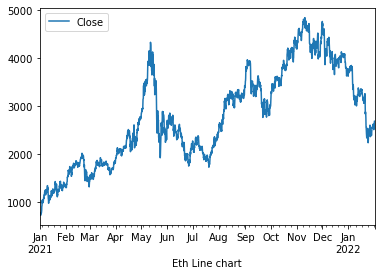

In [109]:
concatenated_df.plot('Date_time', 'Close', xlabel = "Eth Line chart")

In [110]:
df_otc_file

,Time period,Counterparty,Buy,Sell,Size,Size Difference in transaction,Time Difference in transaction,std in size
4750,15,Alpha Fund Stars,1.0,0.0,53,NaN,NaN,NaN
4751,60,Alpha Fund Stars,0.0,1.0,44,-9.0,45.0,NaN
4752,63,Alpha Fund Stars,0.0,1.0,48,4.0,3.0,9.192388
4754,65,Alpha Fund Stars,1.0,0.0,56,8.0,2.0,8.888194
4753,65,Alpha Fund Stars,1.0,0.0,44,-12.0,0.0,10.583005
...,...,...,...,...,...,...,...,...
2368,2369,Charlie the Chad,1.0,0.0,55,3.0,2.0,2.000000
2370,2371,Charlie the Chad,1.0,0.0,49,-6.0,2.0,6.658328
2371,2372,Charlie the Chad,1.0,0.0,50,1.0,1.0,4.725816
2373,2374,Charlie the Chad,0.0,1.0,27,-23.0,2.0,12.342339


In [111]:
concatenated_df.insert(1, 'Time period', range(1, len(concatenated_df)+1))
#now we need to join the data from mining with this time series data that we have 
Regression_data = concatenated_df.merge(df_otc_file, on='Time period', how='left', indicator=False)
Regression_data


,Open time,Time period,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,...,% change in after 1 period,% change in after 3 period,% change in after 5 period,Counterparty,Buy,Sell,Size,Size Difference in transaction,Time Difference in transaction,std in size
0,1609459200000,1,736.42,749.00,729.33,744.82,130893.19622,1609473599999,9.710534e+07,96179,...,-0.998899,-1.266078,-2.136087,Charlie the Chad,1.0,0.0,47.0,NaN,NaN,2.121320
1,1609473600000,2,744.87,747.09,734.40,737.38,72474.10311,1609487999999,5.365272e+07,56675,...,0.199354,-1.632808,-0.947951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1609488000000,3,737.37,741.76,725.10,738.85,128108.21447,1609502399999,9.401424e+07,97917,...,-0.468295,-1.345334,-0.504839,Charlie the Chad,0.0,1.0,35.0,-12.0,2.0,10.606602
3,1609502400000,4,738.85,743.33,732.12,735.39,121504.02184,1609516799999,8.966374e+07,84247,...,-1.366622,-0.679911,-0.773739,Billy the Beta Miner,0.0,1.0,50.0,NaN,NaN,26.870058
4,1609502400000,4,738.85,743.33,732.12,735.39,121504.02184,1609516799999,8.966374e+07,84247,...,-1.366622,-0.679911,-0.773739,Charlie the Chad,0.0,1.0,45.0,10.0,1.0,15.556349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,1643616000000,2373,2529.07,2569.75,2518.45,2558.01,43930.58620,1643630399999,1.116032e+08,85710,...,2.449169,5.040246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2924,1643630400000,2374,2558.00,2635.00,2520.00,2620.66,88049.15610,1643644799999,2.272586e+08,156591,...,1.986522,NaN,NaN,Billy the Beta Miner,0.0,1.0,52.0,3.0,6.0,2.081666
2925,1643630400000,2374,2558.00,2635.00,2520.00,2620.66,88049.15610,1643644799999,2.272586e+08,156591,...,1.986522,NaN,NaN,Charlie the Chad,0.0,1.0,27.0,-23.0,2.0,12.342339
2926,1643644800000,2375,2620.66,2706.77,2613.35,2672.72,120641.95050,1643659199999,3.224175e+08,228219,...,0.532042,NaN,NaN,Charlie the Chad,0.0,1.0,55.0,28.0,1.0,25.514702


In [112]:
Regression_data.loc[Regression_data['Counterparty']== 'Alpha Fund Stars']
#Report_Card.loc[:,["Lectures","Grades"]]


,Open time,Time period,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,...,% change in after 1 period,% change in after 3 period,% change in after 5 period,Counterparty,Buy,Sell,Size,Size Difference in transaction,Time Difference in transaction,std in size
17,1609660800000,15,799.74,832.30,791.50,829.76,334288.39418,1609675199999,2.734814e+08,221265,...,10.600656,17.899152,25.856874,Alpha Fund Stars,1.0,0.0,53.0,NaN,NaN,NaN
74,1610308800000,60,1263.32,1287.51,1170.00,1254.25,436578.60839,1610323199999,5.433140e+08,321285,...,-11.968108,-14.859876,-21.514052,Alpha Fund Stars,0.0,1.0,44.0,-9.0,45.0,NaN
77,1610352000000,63,1071.98,1149.99,1063.00,1067.87,503363.61135,1610366399999,5.566638e+08,330588,...,-8.489797,1.792353,6.665605,Alpha Fund Stars,0.0,1.0,48.0,4.0,3.0,9.192388
80,1610380800000,65,977.21,1024.00,915.00,984.41,883171.42096,1610395199999,8.579788e+08,516327,...,10.422487,15.708902,7.002164,Alpha Fund Stars,1.0,0.0,56.0,8.0,2.0,8.888194
81,1610380800000,65,977.21,1024.00,915.00,984.41,883171.42096,1610395199999,8.579788e+08,516327,...,10.422487,15.708902,7.002164,Alpha Fund Stars,1.0,0.0,44.0,-12.0,0.0,10.583005
152,1611244800000,125,1188.54,1238.90,1164.00,1231.18,349964.97732,1611259199999,4.188886e+08,291022,...,-9.764616,-7.115125,0.138079,Alpha Fund Stars,0.0,1.0,59.0,15.0,60.0,14.011900
153,1611244800000,125,1188.54,1238.90,1164.00,1231.18,349964.97732,1611259199999,4.188886e+08,291022,...,-9.764616,-7.115125,0.138079,Alpha Fund Stars,0.0,1.0,55.0,-4.0,0.0,13.868429
208,1611892800000,170,1320.80,1326.53,1285.35,1315.90,251920.55637,1611907199999,3.282580e+08,215676,...,7.679915,2.462193,2.037389,Alpha Fund Stars,1.0,0.0,27.0,-28.0,45.0,21.548395
209,1611892800000,170,1320.80,1326.53,1285.35,1315.90,251920.55637,1611907199999,3.282580e+08,215676,...,7.679915,2.462193,2.037389,Alpha Fund Stars,1.0,0.0,48.0,21.0,0.0,24.501701
390,1614052800000,320,1679.79,1696.00,1555.00,1586.64,448422.56637,1614067199999,7.222649e+08,428286,...,-8.418419,-8.760651,3.146902,Alpha Fund Stars,0.0,1.0,28.0,-20.0,150.0,26.286879


In [113]:
Regression_data.Counterparty.unique()

array(['Charlie the Chad', nan, 'Billy the Beta Miner',
       'Alpha Fund Stars'], dtype=object)

In [114]:
Regression_data['dummy variable_buy'] = np.where(Regression_data['Buy'] == 1, 1, 0)
Regression_data['dummy variable_sell'] = np.where(Regression_data['Sell'] == 1, 1, 0)

<AxesSubplot:>

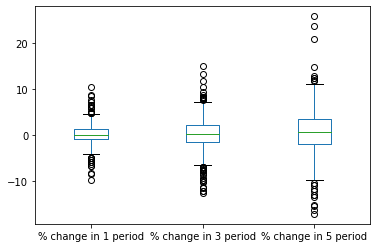

In [115]:
Regression_data_Billy = Regression_data.loc[Regression_data['Counterparty'] == 'Billy the Beta Miner']
Regression_data_Billy.boxplot( column =['% change in 1 period','% change in 3 period','% change in 5 period'], grid = False)


In [116]:
import statsmodels.api as smf


x= Regression_data_Billy[['dummy variable_buy','dummy variable_sell']]
y = Regression_data_Billy['% change in 1 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                             OLS Regression Results                             
Dep. Variable:     % change in 1 period   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                       nan
Date:                  Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                          00:11:59   Log-Likelihood:                -1342.1
No. Observations:                   603   AIC:                             2686.
Df Residuals:                       602   BIC:                             2691.
Df Model:                             0                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % change in 1 period   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                       nan
Date:                  Sun, 27 Mar 2022   Prob (F-statistic):                nan
Time:                          00:11:59   Log-Likelihood:                -1342.1
No. Observations:                   603   AIC:                             2686.
Df Residuals:                       602   BIC:                             2691.
Df Model:                             0                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_buy           0          0        nan        nan           0           0
dummy variable_sell     0.1726      0.091      1.890      0.059      -0.007       0.352
==============================================================================
Omnibus:                       44.274   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.901
Skew:                           0.096   Prob(JB):                     2.60e-41
Kurtosis:                       5.721   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
Regression_data_Billy['% change in 1 period'].mean()

0.1725810915586642

In [48]:
x= Regression_data_Billy[['dummy variable_buy','dummy variable_sell']]
y = Regression_data_Billy['% change in 3 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                             OLS Regression Results                             
Dep. Variable:     % change in 3 period   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                       nan
Date:                  Sat, 26 Mar 2022   Prob (F-statistic):                nan
Time:                          23:28:38   Log-Likelihood:                -1613.0
No. Observations:                   603   AIC:                             3228.
Df Residuals:                       602   BIC:                             3232.
Df Model:                             0                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % change in 3 period   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                       nan
Date:                  Sat, 26 Mar 2022   Prob (F-statistic):                nan
Time:                          23:28:38   Log-Likelihood:                -1613.0
No. Observations:                   603   AIC:                             3228.
Df Residuals:                       602   BIC:                             3232.
Df Model:                             0                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_buy           0          0        nan        nan           0           0
dummy variable_sell     0.2516      0.143      1.758      0.079      -0.030       0.533
==============================================================================
Omnibus:                       34.025   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.674
Skew:                          -0.211   Prob(JB):                     2.77e-21
Kurtosis:                       4.895   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
Regression_data_Billy['% change in 3 period'].mean()

0.25155134291100345

In [50]:
x= Regression_data_Billy[['dummy variable_buy','dummy variable_sell']]
y = Regression_data_Billy['% change in 5 period']

result = smf.OLS(y, x, missing = 'drop').fit()

result.summary()

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % change in 5 period   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                       nan
Date:                  Sat, 26 Mar 2022   Prob (F-statistic):                nan
Time:                          23:28:56   Log-Likelihood:                -1806.8
No. Observations:                   602   AIC:                             3616.
Df Residuals:                       601   BIC:                             3620.
Df Model:                             0                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_buy           0          0        nan        nan           0           0
dummy variable_sell     0.6641      0.199      3.345      0.001       0.274       1.054
==============================================================================
Omnibus:                       48.303   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.850
Skew:                           0.205   Prob(JB):                     1.80e-43
Kurtosis:                       5.771   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
x= Regression_data_Billy[['dummy variable_buy','dummy variable_sell']]
y = Regression_data_Billy['% change in 5 period']

result = smf.OLS(y, x, missing = 'drop').fit()

print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     % change in 5 period   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                       nan
Date:                  Sat, 26 Mar 2022   Prob (F-statistic):                nan
Time:                          23:29:15   Log-Likelihood:                -1806.8
No. Observations:                   602   AIC:                             3616.
Df Residuals:                       601   BIC:                             3620.
Df Model:                             0                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [52]:
Regression_data_Billy['% change in 5 period'].mean()

0.6640624009802791

In [118]:
Regression_data_Alpha = Regression_data.loc[Regression_data['Counterparty'] == 'Alpha Fund Stars']


<AxesSubplot:>

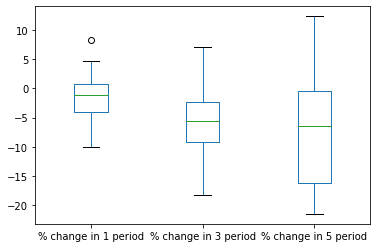

In [119]:
Regression_data_Alpha.boxplot( column =['% change in 1 period','% change in 3 period','% change in 5 period'], grid = False)


In [120]:
x= Regression_data_Alpha[['dummy variable_buy','dummy variable_sell']]
y = Regression_data_Alpha['% change in 1 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                             OLS Regression Results                             
Dep. Variable:     % change in 1 period   R-squared:                       0.177
Model:                              OLS   Adj. R-squared:                  0.155
Method:                   Least Squares   F-statistic:                     8.177
Date:                  Sun, 27 Mar 2022   Prob (F-statistic):            0.00685
Time:                          00:12:21   Log-Likelihood:                -109.65
No. Observations:                    40   AIC:                             223.3
Df Residuals:                        38   BIC:                             226.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % change in 1 period   R-squared:                       0.177
Model:                              OLS   Adj. R-squared:                  0.155
Method:                   Least Squares   F-statistic:                     8.177
Date:                  Sun, 27 Mar 2022   Prob (F-statistic):            0.00685
Time:                          00:12:21   Log-Likelihood:                -109.65
No. Observations:                    40   AIC:                             223.3
Df Residuals:                        38   BIC:                             226.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_buy     -3.5482      0.861     -4.122      0.000      -5.291      -1.806
dummy variable_sell    -0.0674      0.861     -0.078      0.938      -1.810       1.675
==============================================================================
Omnibus:                        1.812   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.228
Skew:                           0.144   Prob(JB):                        0.541
Kurtosis:                       2.191   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
Regression_data_Alpha['% change in 1 period'].mean()

-1.8078035348281063

In [122]:
y

17       3.748531
74      -0.706160
77      -0.370391
80       0.736791
81       0.736791
152      3.575395
153      3.575395
208     -0.372496
209     -0.372496
390     -5.552083
391     -5.552083
393     -8.418419
395      8.321691
397     -8.027370
398     -8.027370
826     -1.272786
839     -6.583755
840     -6.583755
1012     4.763660
1013    -9.546635
1026    -0.802673
1030    -3.623560
1031    -3.623560
1038     1.375199
1048     0.945678
1055    -3.494436
1063    -1.953523
1077     3.020353
1078     3.020353
1081   -10.064349
1083    -3.767521
1084    -3.767521
1333    -1.141509
1334    -1.141509
1853    -3.467436
1975     0.419197
1976     0.419197
2445    -1.879082
2446    -1.879082
2590    -4.978811
Name: % change in 1 period, dtype: float64

In [123]:
x= Regression_data_Alpha['dummy variable_buy']
y = Regression_data_Alpha['% change in after 1 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                     OLS Regression Results                                    
Dep. Variable:     % change in after 1 period   R-squared (uncentered):                   0.468
Model:                                    OLS   Adj. R-squared (uncentered):              0.455
Method:                         Least Squares   F-statistic:                              34.38
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                    8.03e-07
Time:                                00:12:23   Log-Likelihood:                         -131.59
No. Observations:                          40   AIC:                                      265.2
Df Residuals:                              39   BIC:                                      266.9
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
                         coef    std err

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     % change in after 1 period   R-squared (uncentered):                   0.468
Model:                                    OLS   Adj. R-squared (uncentered):              0.455
Method:                         Least Squares   F-statistic:                              34.38
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                    8.03e-07
Time:                                00:12:23   Log-Likelihood:                         -131.59
No. Observations:                          40   AIC:                                      265.2
Df Residuals:                              39   BIC:                                      266.9
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
dummy variable_buy     8.6221      1.471      5.863      0.000       5.648      11.597
==============================================================================
Omnibus:                      123.349   Durbin-Watson:                   0.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.261
Skew:                          -0.007   Prob(JB):                       0.0720
Kurtosis:                       1.223   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
x

17      1
74      0
77      0
80      1
81      1
152     0
153     0
208     1
209     1
390     0
391     0
393     1
395     0
397     1
398     1
826     1
839     1
840     1
1012    0
1013    1
1026    0
1030    0
1031    0
1038    1
1048    0
1055    1
1063    0
1077    0
1078    0
1081    1
1083    1
1084    1
1333    1
1334    1
1853    0
1975    0
1976    0
2445    0
2446    0
2590    1
Name: dummy variable_buy, dtype: int32

In [125]:
Regression_data_Alpha

,Open time,Time period,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,...,% change in after 5 period,Counterparty,Buy,Sell,Size,Size Difference in transaction,Time Difference in transaction,std in size,dummy variable_buy,dummy variable_sell
17,1609660800000,15,799.74,832.30,791.50,829.76,334288.39418,1609675199999,2.734814e+08,221265,...,25.856874,Alpha Fund Stars,1.0,0.0,53.0,NaN,NaN,NaN,1,0
74,1610308800000,60,1263.32,1287.51,1170.00,1254.25,436578.60839,1610323199999,5.433140e+08,321285,...,-21.514052,Alpha Fund Stars,0.0,1.0,44.0,-9.0,45.0,NaN,0,1
77,1610352000000,63,1071.98,1149.99,1063.00,1067.87,503363.61135,1610366399999,5.566638e+08,330588,...,6.665605,Alpha Fund Stars,0.0,1.0,48.0,4.0,3.0,9.192388,0,1
80,1610380800000,65,977.21,1024.00,915.00,984.41,883171.42096,1610395199999,8.579788e+08,516327,...,7.002164,Alpha Fund Stars,1.0,0.0,56.0,8.0,2.0,8.888194,1,0
81,1610380800000,65,977.21,1024.00,915.00,984.41,883171.42096,1610395199999,8.579788e+08,516327,...,7.002164,Alpha Fund Stars,1.0,0.0,44.0,-12.0,0.0,10.583005,1,0
152,1611244800000,125,1188.54,1238.90,1164.00,1231.18,349964.97732,1611259199999,4.188886e+08,291022,...,0.138079,Alpha Fund Stars,0.0,1.0,59.0,15.0,60.0,14.011900,0,1
153,1611244800000,125,1188.54,1238.90,1164.00,1231.18,349964.97732,1611259199999,4.188886e+08,291022,...,0.138079,Alpha Fund Stars,0.0,1.0,55.0,-4.0,0.0,13.868429,0,1
208,1611892800000,170,1320.80,1326.53,1285.35,1315.90,251920.55637,1611907199999,3.282580e+08,215676,...,2.037389,Alpha Fund Stars,1.0,0.0,27.0,-28.0,45.0,21.548395,1,0
209,1611892800000,170,1320.80,1326.53,1285.35,1315.90,251920.55637,1611907199999,3.282580e+08,215676,...,2.037389,Alpha Fund Stars,1.0,0.0,48.0,21.0,0.0,24.501701,1,0
390,1614052800000,320,1679.79,1696.00,1555.00,1586.64,448422.56637,1614067199999,7.222649e+08,428286,...,3.146902,Alpha Fund Stars,0.0,1.0,28.0,-20.0,150.0,26.286879,0,1


In [126]:
x= Regression_data_Alpha['dummy variable_sell']
y = Regression_data_Alpha['% change in after 1 period']
result = smf.OLS(y, x, missing = 'drop').fit()
print(result.summary())
result.summary()

                                     OLS Regression Results                                    
Dep. Variable:     % change in after 1 period   R-squared (uncentered):                   0.519
Model:                                    OLS   Adj. R-squared (uncentered):              0.506
Method:                         Least Squares   F-statistic:                              42.02
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                    1.11e-07
Time:                                00:12:53   Log-Likelihood:                         -129.61
No. Observations:                          40   AIC:                                      261.2
Df Residuals:                              39   BIC:                                      262.9
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
                          coef    std er

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     % change in after 1 period   R-squared (uncentered):                   0.519
Model:                                    OLS   Adj. R-squared (uncentered):              0.506
Method:                         Least Squares   F-statistic:                              42.02
Date:                        Sun, 27 Mar 2022   Prob (F-statistic):                    1.11e-07
Time:                                00:12:53   Log-Likelihood:                         -129.61
No. Observations:                          40   AIC:                                      261.2
Df Residuals:                              39   BIC:                                      262.9
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
dummy variable_sell    -9.0719      1.399     -6.482      0.000     -11.903      -6.241
==============================================================================
Omnibus:                      102.940   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.119
Skew:                          -0.008   Prob(JB):                       0.0774
Kurtosis:                       1.248   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""